In [51]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [52]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW10


---
__Name:__  Megan Jasek  
__Class:__ MIDS w261 (Section Summer 2016 Group 2)     
__Email:__  meganjasek@iSchool.Berkeley.edu     
__Week:__   10

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    10.0.  [Short Answer Questions](#HW10.0)    
    10.1.  [Word Count plus sorting](#HW10.1)   
    10.2.  [MLlib-centric Kmeans](#HW10.2)    
    10.3.  [Homegrown KMeans in Spark](#HW10.3)    
    10.4.  [Making Homegrown KMeans more efficient](#HW10.4)  
    10.5.  [OPTIONAL Weighted KMeans](#HW10.5)  
    10.6.  [OPTIONAL Linear Regression](#HW10.6)  
    10.7.  [OPTIONAL Error surfaces](#HW10.7)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Tueday, 07/28/2016 at 11AM (West Coast Time).


* Prepare a single Jupyter note, please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](
https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 
)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

<a name="3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="HW10.0"></a><h2 style="color:darkblue"> HW10.0: Short answer questions </h2>
[Back to Table of Contents](#TOC)


__What is Apache Spark and how is it different to Apache Hadoop? __

__Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ___ BLANKS __ languages (list languages). __

<hr>

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

<hr>


### Create Spark Context

In [1]:
import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "HW10"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc.stop()
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)

print sc
print sqlContext

In [ ]:
#sc.stop()

<a name="HW10.1"> <h2 style="color:darkgreen">HW10.1 WordCount plus sorting </h2>
[Back to Table of Contents](#TOC)

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Plseas refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

**ANSWER:**  

This file was used for this problem:  https://www.dropbox.com/s/0vnj77z74piklsy/MIDS-MLS-HW-10.txt?dl=0  

**Top 20 most frequent words**  
1. the - 70  
2. and - 36  
3. in - 25  
4. of - 24  
5. a - 18  
6. for - 12  
7. code - 12  
8. to - 12  
9. is - 11  
10. model - 11  
11. with - 10  
12. data - 10  
13. === - 9  
14. as - 9  
15. on - 9  
16. plot - 9  
17. this - 8  
18. = - 8  
19. Using - 8  
20. your - 8  

**Top 10 least frequent words**  
474. 20, - 1  
475. descent - 1  
476. other - 1  
477. give - 1  
478. center - 1  
479. sets - 1  
480. element - 1  
481. graphs - 1  
482. 10.1: - 1  
483. #10 - 1  

### Wordcount sorted by decreasing order of frequency

In [7]:
from operator import add

# Create an RDD called wordCount.  Apply these transformations:  1) flatmap to output
# every word, 2) map each word with 1, 3) sum the counts for all words, 4) reverse
# the order of the key and value in preparation for sorting, 5) sortByKey in
# reverse order by count of word, 6) reverse the order of the key and value again
# so the word is listed first.
wordCount = sc.textFile('MIDS-MLS-HW-10.txt').flatMap(lambda x: x.strip().split()) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(add) \
    .map(lambda (x, y): (y, x)) \
    .sortByKey(False) \
    .map(lambda (x, y): (y, x))
# Perform an action (count) to count all of the unique words
results_count = wordCount.count()

# Print the top 20 most frequent words and the 10 least frequent
for i, wc in enumerate(wordCount.collect()):
    if (i < 20) or (i >= results_count-10):
        print('%d. %s - %d' % (i+1, wc[0], wc[1]))

1. the - 70
2. and - 36
3. in - 25
4. of - 24
5. a - 18
6. for - 12
7. code - 12
8. to - 12
9. is - 11
10. model - 11
11. with - 10
12. data - 10
13. === - 9
14. as - 9
15. on - 9
16. plot - 9
17. this - 8
18. = - 8
19. Using - 8
20. your - 8
474. 20, - 1
475. descent - 1
476. other - 1
477. give - 1
478. center - 1
479. sets - 1
480. element - 1
481. graphs - 1
482. 10.1: - 1
483. #10 - 1


<a name="HW10.1.1"><h2 style="color:darkgreen">HW10.1.1 </h2>
[Back to Table of Contents](#TOC)

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.  

**ANSWER:**  

This file was used for this problem:  https://www.dropbox.com/s/0vnj77z74piklsy/MIDS-MLS-HW-10.txt?dl=0  

**Top 20 most frequent words that begin with lower case letters (a-z)**  
1. the - 70  
2. and - 36  
3. in - 25  
4. of - 24  
5. a - 18  
6. for - 12  
7. code - 12  
8. to - 12  
9. is - 11  
10. model - 11  
11. with - 10  
12. data - 10  
13. as - 9  
14. on - 9  
15. plot - 9  
16. this - 8  
17. your - 8  
18. each - 7  
19. domain - 6  
20. from - 6  

**Top 10 least frequent words that begin with lower case letters (a-z)**  
304. applications - 1  
305. notebook - 1  
306. such - 1  
307. descent - 1  
308. give - 1  
309. center - 1  
310. sets - 1  
311. element - 1  
312. graphs - 1  
313. title - 1  


### Wordcount with lower case letters (a-z) sorted by decreasing order of frequency

In [8]:
from operator import add
import re

# Funtion that returns true if a word begins a lowercase letter [a-z]
def filterLowerCase(s):
    pattern = re.compile("[a-z]")
    return bool(pattern.match(s))

# Create an RDD called wordCount.  Apply these transformations:  1) flatmap to output
# every word, 2) filter to capture only the words that begin with lowercase letters [a-z]
# 3) map each word with 1, 4) sum the counts for all words, 5) reverse
# the order of the key and value in preparation for sorting, 6) sortByKey in
# reverse order by count of word, 7) reverse the order of the key and value again
# so the word is listed first.
wordCount = sc.textFile('MIDS-MLS-HW-10.txt').flatMap(lambda x: x.strip().split()) \
    .filter(filterLowerCase) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(add) \
    .map(lambda (x, y): (y, x)) \
    .sortByKey(False) \
    .map(lambda (x, y): (y, x))
    
# Perform an action (count) to count all of the unique words
results_count = wordCount.count()

# Print the top 20 most frequent words and the 10 least frequent
for i, wc in enumerate(wordCount.collect()):
    if (i < 20) or (i >= results_count-10):
        print('%d. %s - %d' % (i+1, wc[0], wc[1]))

1. the - 70
2. and - 36
3. in - 25
4. of - 24
5. a - 18
6. for - 12
7. code - 12
8. to - 12
9. is - 11
10. model - 11
11. with - 10
12. data - 10
13. as - 9
14. on - 9
15. plot - 9
16. this - 8
17. your - 8
18. each - 7
19. domain - 6
20. from - 6
304. applications - 1
305. notebook - 1
306. such - 1
307. descent - 1
308. give - 1
309. center - 1
310. sets - 1
311. element - 1
312. graphs - 1
313. title - 1


<a name="HW10.2"> <h2 style="color:darkblue"> HW10.2: MLlib-centric KMeans</h2>
[Back to Table of Contents](#TOC)

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that you find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

**ANSWER:**  
**Data points:**  
0.0 0.0 0.0  
0.1 0.1 0.1  
0.2 0.2 0.2  
9.0 9.0 9.0  
9.1 9.1 9.1  
9.2 9.2 9.2  

**Cluster centers:**  ( 0.1,  0.1,  0.1) and ( 9.1,  9.1,  9.1 )  
**Within Set Sum of Squared Error (WSSSE)** = 0.692820323028 

The algorithm converged by 10 iterations.  The final cluster centers are 2 of the actual data points.  All of the data points are very close to their cluster centers, so the WSSSE is small.

In [14]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10, runs=10, initializationMode="random")

# Function to compute the error for each point
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

# Evaluate clustering by computing Within Set Sum of Squared Errors
WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))
print clusters.centers

# Save and load model
modelDirectory = 'kmeans_mllib_model'
!rm -rf $modelDirectory
clusters.save(sc, modelDirectory)
sameModel = KMeansModel.load(sc, modelDirectory)

Within Set Sum of Squared Error = 0.692820323028
[array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]


<a name="HW10.3"><h2 style="color:darkgreen"> HW10.3: Homegrown KMeans in Spark </h2>
[Back to Table of Contents](#TOC)

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).

**ANSWER:**  
The Within Set Sum of Squared Errors (WSSSE) converges to its final value after 1 iteration.  This value does not change after 10, 20, 30, 40, 50 or 100 iterations.  The plot is a straight line.  It is unexpected that the algorithm would converge after 1 iteration.  This is probably due to the fact that the MLLib algorithm uses the runs parameter and runs the algorithm 10 times (in this case) and returns the best result from those runs.  

From the docs (http://spark.apache.org/docs/latest/mllib-clustering.html#k-means):  "runs is the number of times to run the k-means algorithm (k-means is not guaranteed to find a globally optimal solution, and when run multiple times on a given dataset, the algorithm returns the best clustering result)."

### Data Generation

In [2]:
import numpy as np

# Set a random seed so results are consistent across multiple runs
np.random.seed(114)

# Create 100 data points
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)

# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('kmeans_point_data.csv',data,delimiter = ',')

### Data Visualization

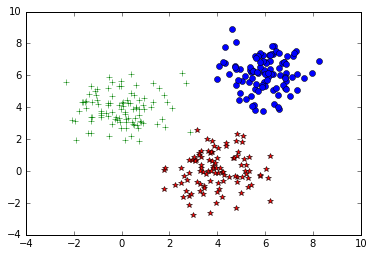

In [3]:
%matplotlib inline
import pylab 

# Plot data
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [4]:
%matplotlib inline
import pylab

#plot centroids and data points
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration 1
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[ 5.96333346  6.13920441]
 [-0.05196282  3.92192865]
 [ 3.95045042  0.0444371 ]]


/usr/local/spark/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


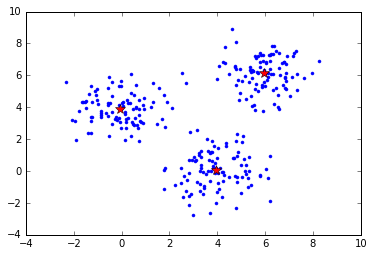

Iteration 10
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[ 3.95045042  0.0444371 ]
 [ 5.96333346  6.13920441]
 [-0.05196282  3.92192865]]


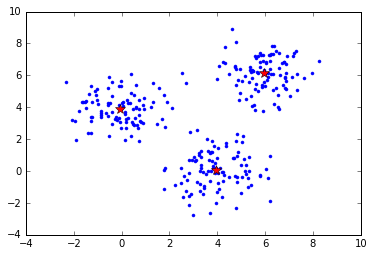

Iteration 20
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[ 3.95045042  0.0444371 ]
 [ 5.96333346  6.13920441]
 [-0.05196282  3.92192865]]


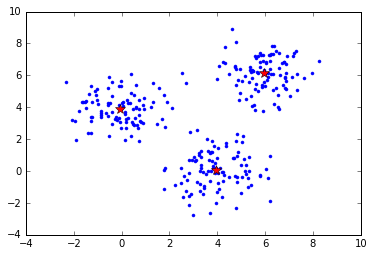

Iteration 100
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[ 3.95045042  0.0444371 ]
 [-0.05196282  3.92192865]
 [ 5.96333346  6.13920441]]


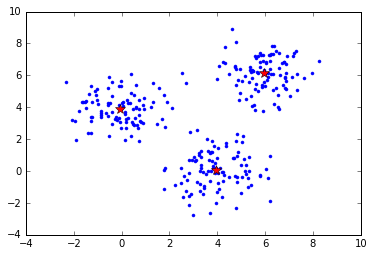

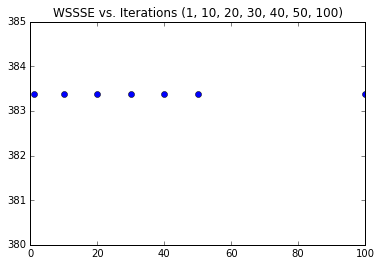

In [5]:
%matplotlib inline
import pylab 
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("kmeans_point_data.csv")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

# Initialize variables
WSSSE_dict = {}
clusters_dict = {}

# Run the algorithm for these numbers of iterations
iterations = [1, 10, 20, 30, 40, 50, 100]
for i in iterations:
    # Build the model (cluster the data into 3 clusters)
    clusters = KMeans.train(parsedData, 3, maxIterations=i, runs=10, initializationMode="random")
    clusters_dict[i] = clusters

    # Function to compute the error for each point
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    WSSSE_dict[i] = WSSSE

    # Plot the points only for iterations 1, 10, 20 and 100
    if i in [1, 10, 20, 100]:
        print 'Iteration', str(i)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print np.array(clusters.centers)
        plot_iteration(clusters.centers)
    
    # Save and load model
    modelDirectory = 'kmeans_mllib_model_' + str(i)
    !rm -rf $modelDirectory
    clusters.save(sc, modelDirectory)
    #sameModel = KMeansModel.load(sc, modelDirectory)

# Plot WSSSE vs. Iterations
for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.ylim(380,385) 
pylab.show()

<a name="HW10.4"><h2 style="color:darkblue"> HW10.4: KMeans Experiments  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW10.3. Explain any differences between the results in HW10.3 and HW10.4. 

**ANSWER:**  
The observed differences between HW10.3 and HW10.4 are as follows:
- In HW10.3, after 1 iteration the centroids are very close to the final centroids found at convergence.  In HW10.4, after 1 iteration the centroids are noticably different from the final centroids.  This has to do with the fact that in HW10.3 MLLib is using the runs parameter with random initialization and running the algorithm 10 times (runs=10) for each number of iterations and then returning the best result of those 10 runs.
- HW10.4 also may have taken longer to converge because it started at a fixed initialization centroids (as opposed to random with HW10.3).  These fixed points were not close to the final converged centroids.

In [6]:
import numpy as np
from math import sqrt

# Calculate which class each data point belongs to
# NOTE:  the data is available here to calculate the error between each point and
# its centroid, so make that calculation. 
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    error = sqrt(sum((x - centroids[closest_centroid_idx])**2))
    return (closest_centroid_idx,(x,1,error))

Iteration 1
Within Set Sum of Squared Error = 1093.7668628
Centroids:
[[ 1.30294393 -0.04702418]
 [ 3.75700875  2.62593297]
 [ 2.72830099  5.9395683 ]]


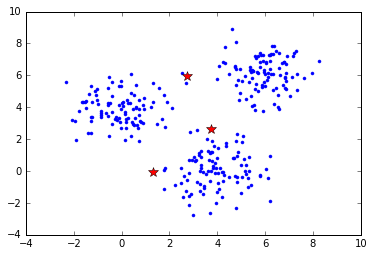

Iteration 10
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


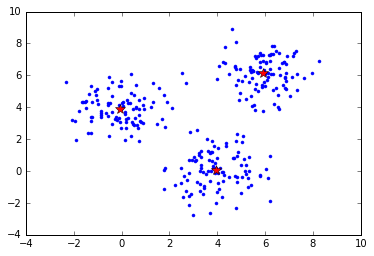

Iteration 20
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


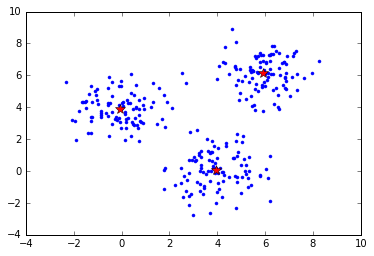

Iteration 100
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


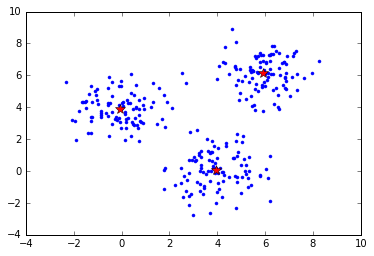

Final Results:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]
Average Iteration Time 0.142248301506


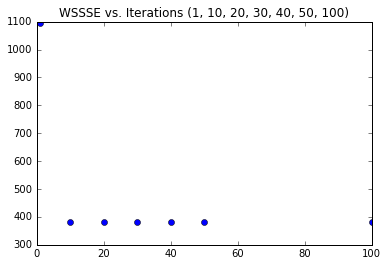

In [7]:
import time

# Set the value of K for the K-means clustering
K = 3

# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

# Load the data previously created
D = sc.textFile("kmeans_point_data.csv").cache()

# Initialize variables
WSSSE_dict = {}
iter_num = 0
sum_time = 0.0

# Run the algorithm for 100 iterations
for iter_num in range(1,101):  
    start_time = time.time()
    # Perform the following transformation on the res RDD:  1) calculate the nearest_centroid and error,
    # 2) reduceByKey and aggregate the sum of points, count of points and error of points
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    WSSSE = sum([x[1][2] for x in res])  #sum up the error for all clusters
    # Store all WSSSE values
    WSSSE_dict[iter_num] = WSSSE
    iter_time = time.time() - start_time 
    #print 'Iteration time is', iter_time
    sum_time += iter_time

    # Plot the points only for iterations 1, 10, 20 and 100
    if iter_num in [1, 10, 20, 100]:
        print "Iteration", str(iter_num)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print centroids_new
        plot_iteration(centroids_new)
    centroids = centroids_new
    iter_num = iter_num + 1 
print "Final Results:"
print centroids
print 'Average Iteration Time', sum_time/100.0

# Plot WSSSE vs. Iterations for iterations:  1, 10, 20, 30, 40, 50, 100
iterations = [1, 10, 20, 30, 40, 50, 100]
for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.show()

<a name="HW10.4.1"><h2 style="color:darkblue"> HW10.4.1: Making Homegrown KMeans more efficient  </h2>
[Back to Table of Contents](#TOC)

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

**ANSWER:**
The original homegrown KMeans code was made more efficient in the following ways:

- A broadcast variable was used.  The centroid values were broadcast to each executor instead of being passed in the closure with each chunk of data.  This allows the centroid values to be passed over the network just one time for each executer instead of one time for each data chunk.  This can be a significant resource savings because the number of chunks and the number of centroid data points can be large.

From the docs (http://spark.apache.org/docs/latest/programming-guide.html#broadcast-variables):  "Broadcast variables allow the programmer to keep a read-only variable cached on each machine rather than shipping a copy of it with tasks. They can be used, for example, to give every node a copy of a large input dataset in an efficient manner. Spark also attempts to distribute broadcast variables using efficient broadcast algorithms to reduce communication cost."

- The calculation of the error for each data point was moved from a separate map opertion in to the map operation that was calculating the nearest centroid.  This saves a mapping step.  NOTE:  This change was also done in HW10.4 above.

- A reduceByKey funtion was created called calculate_results that calculates the new centroids as the same as as aggregating the data points, count of data points and error.  The new centroids are calculated by dividing the sum of data points by the count of the data points.  ReduceByKey transformations are expensive because they do a shuffle (which consumes a lot of resources).  In this case, this cannot be avoided because the new centroid values for each cluster need to be calculated by key (using the cluster id).

- Sorting the data by cluster id does not add value to the algorithm so it was removed.  This line was removed:  
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID  
NOTE:  if the algorithm was required to sort by cluster id using the above line is a way to do that with descent performance.  Using a line like:  
    res = D.map(nearest_centroid_broadcast).reduceByKey(calculate_results).sortByKey().collect()  
with a sortByKey transformation is expensive because it does a shuffle in Spark.  A test was done with the above line at it doubled run time.

**Performance Gains:**  
**Average Iteration Time for HW10.4:** 0.142248301506 seconds  
**Average Iteration Time for HW10.4.1:**  0.136750900745 seconds  
Although, the average iteration time is slightly less for this optimized algorithm, there are not enough data points here to draw any conclusions.  The benefits of using broadcast may not be seen on such a small dataset.  The speed up may have come mostly from removing sorting.

### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

In [8]:
import numpy as np
from math import sqrt

# Calculate which class each data point belongs to
# NOTE:  the data is available here to calculate the error between each point and
# its centroid, so make that calculation. 
def nearest_centroid_broadcast(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids.value)**2, axis=1).argmin()
    error = sqrt(sum((x - centroids.value[closest_centroid_idx])**2))
    return (closest_centroid_idx,(x,1,error))

# Aggregate the sum of points, count of points, error of points and new centroid centers
# NOTE:  the new centroid centers can be calculated with this method
def calculate_results(x, y):
    points = x[0]+y[0]
    count = x[1]+y[1]
    error = x[2]+y[2]
    next_centroids = points/float(count)  #divide by cluster size
    return (points, count, error, next_centroids)

Iteration 1
Within Set Sum of Squared Error = 1093.7668628
Centroids:
[[ 1.30294393 -0.04702418]
 [ 2.72830099  5.9395683 ]
 [ 3.75700875  2.62593297]]


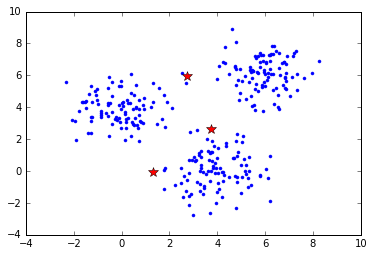

Iteration 10
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


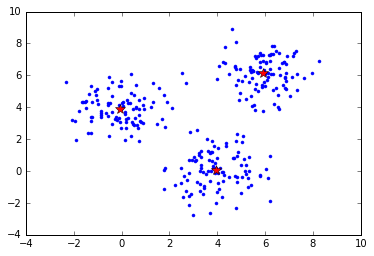

Iteration 20
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


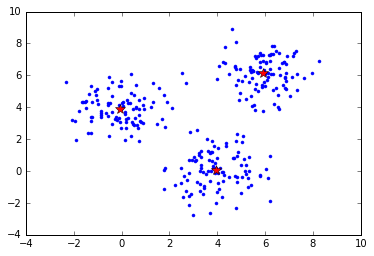

Iteration 100
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


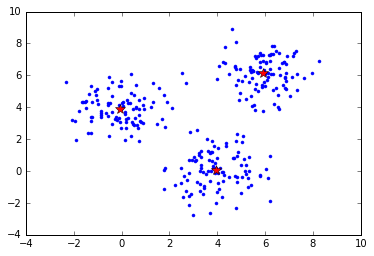

Final Results:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]
Average Iteration Time 0.136750900745


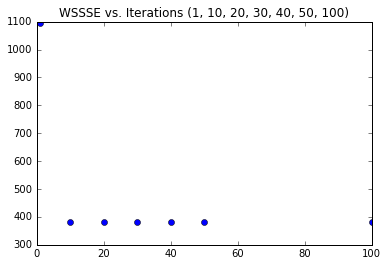

In [9]:
import time

# Set the value of K for the K-means clustering
K = 3

# Initialization: initialization of parameter is fixed to show an example
# Broadcast centroids to all executors
centroids = sc.broadcast(np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]]))

# Load the data previously created
D = sc.textFile("kmeans_point_data.csv").cache()

# Initialze variables
WSSSE_dict = {}
sum_time = 0.0
iter_num = 0

# Run the algorithm for 100 iterations
for iter_num in range(1,101):  
    start_time = time.time()
    # Perform the following transformation on the res RDD:  1) calculate the nearest_centroid and error,
    # 2) reduceByKey and aggregate the sum of points, count of points, error of points and new centroids
    res = D.map(nearest_centroid_broadcast).reduceByKey(calculate_results).collect()
    # Set a variable with the new centroids
    centroids_new = np.array([x[1][3] for x in res])
    WSSSE = sum([x[1][2] for x in res])  #sum up the error for all clusters
    # Store the WSSSE values
    WSSSE_dict[iter_num] = WSSSE
    iter_time = time.time() - start_time 
    #print 'Iteration time is', iter_time
    sum_time += iter_time
    
    # Plot the points only for iterations 1, 10, 20 and 100
    if iter_num in [1, 10, 20, 100]:
        print "Iteration", str(iter_num)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print centroids_new
        plot_iteration(centroids_new)
    centroids = sc.broadcast(centroids_new)
    iter_num = iter_num + 1 
print "Final Results:"
print centroids.value
print 'Average Iteration Time', sum_time/100.0

# Plot WSSSE vs. Iterations for iterations:  1, 10, 20, 30, 40, 50, 100
iterations = [1, 10, 20, 30, 40, 50, 100]
for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.show()